# Neural Networks Gas Turbines

### The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.


### Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [1]:
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import StandardScaler

In [2]:
turbines = pd.read_csv('C:\\Users\\User\\Documents\\Datascience_Assignments\Assignment 16 (Neural Networks)\\gas_turbines.csv')

In [3]:
turbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
turbines.shape

(15039, 11)

In [5]:
turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
turbines.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [7]:
turbines= turbines[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX', 'TEY']]

In [8]:
turbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72


In [9]:
import matplotlib.pyplot as plt

(array([ 236., 1297., 1877., 2005., 1880., 2190., 2278., 1884., 1088.,
         304.]),
 array([ 0.5223 ,  3.96297,  7.40364, 10.84431, 14.28498, 17.72565,
        21.16632, 24.60699, 28.04766, 31.48833, 34.929  ]),
 <BarContainer object of 10 artists>)

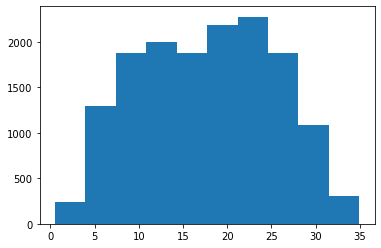

In [10]:
plt.hist(turbines['AT'])

(array([ 236., 1297., 1877., 2005., 1880., 2190., 2278., 1884., 1088.,
         304.]),
 array([ 0.5223 ,  3.96297,  7.40364, 10.84431, 14.28498, 17.72565,
        21.16632, 24.60699, 28.04766, 31.48833, 34.929  ]),
 <BarContainer object of 10 artists>)

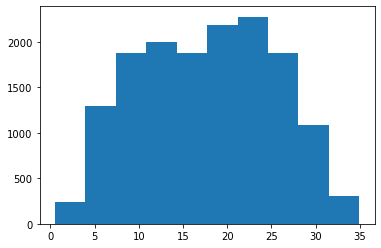

In [11]:
plt.hist(turbines['AT'])

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <BarContainer object of 10 artists>)

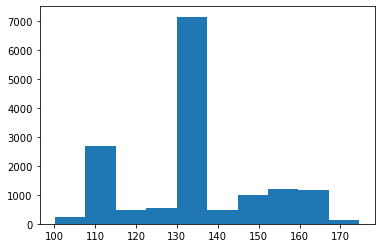

In [12]:
plt.hist(turbines['TEY'])

In [13]:
turb_array= turbines.values

In [14]:
X= turb_array[:,0:10]
Y= turb_array[:,10]

In [18]:
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [19]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04
mean,4.913654e-16,-1.875504e-14,2.570219e-16,1.511894e-16,-7.559468e-17,-3.260021e-15,1.640405e-15,1.965462e-16,3.779734e-17,4.233302e-16
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00,-2.779497e+00,-1.806771e+00,-5.021933e+00,-4.188141e+00,-1.992416e+00,-8.874862e-01,-3.861033e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01,-6.266930e-01,-5.091458e-01,-2.540512e-01,-4.101146e-01,-4.354335e-01,-5.015202e-01,-6.578107e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01,-1.854065e-02,-8.075681e-02,2.965544e-01,5.712570e-01,-7.011925e-02,-2.620452e-01,-1.518527e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01,4.612196e-01,4.228638e-01,7.382490e-01,5.928675e-01,4.311680e-01,8.455882e-02,5.486567e-01
max,2.266234e+00,3.275970e+00,1.528011e+00,4.486233e+00,2.871006e+00,1.028678e+00,6.627839e-01,2.700105e+00,1.895949e+01,4.937717e+00


In [27]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

In [21]:
from keras.layers import Dropout
from sklearn.metrics import classification_report, accuracy_score

In [22]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [23]:
model = KerasRegressor(build_fn = create_model,verbose = 0)

In [24]:
batch_size = [10,20]
epochs = [10,50]
learning_rate = [0.01,0.1]
dropout_rate = [0.0,0.1]
activation_function = ['relu','linear']
init = ['uniform']
neuron1 = [4,8]
neuron2 = [2,4]


In [28]:
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

In [29]:
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5; 1/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=  17.1s
[CV 2/5; 1/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=  17.2s
[CV 3/5; 1/128] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1/128] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=  16.9s
[

In [30]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 1271983555739648.0, using {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learning_rate': 0.1, 'neuron1': 8, 'neuron2': 4}
1034435976.0351562,2068839739.9824495 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 2}
7332088115.2,2017080144.551559 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 4}
10785166607.343164,6789916812.969279 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 2}
10360614188.95957,8673364348.725416 with: {'activation_function': 'relu', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'uniform', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 4}
2225298826867.3594,21970961

In [37]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(8,input_dim = 10,kernel_initializer = 'uniform',activation = 'relu'))
    model1.add(Dropout(0.1))
    model1.add(Dense(4,kernel_initializer = 'uniform',activation = 'relu'))
    model1.add(Dropout(0.1))
    model1.add(Dense(1,activation = 'sigmoid'))
    adam = Adam(lr = 0.1)
    model1.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['accuracy'])
    return model1

In [38]:
model1 = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 50)

In [39]:
model1.fit(X_standardized,Y)

In [40]:
Y_predict = model1.predict(X_standardized)

In [51]:
Y_predict

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [42]:
rmse_value = np.sqrt(np.mean((Y_predict-Y)**2))

In [43]:
rmse_value

134.1258000120717

<function matplotlib.pyplot.show(close=None, block=None)>

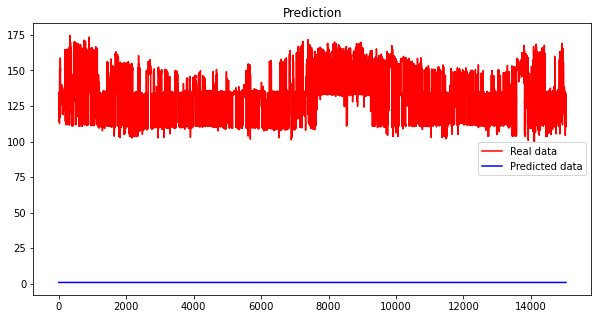

In [45]:
plt.figure(figsize=(10,5))
plt.plot(Y, color= 'red',label= 'Real data')
plt.plot(Y_predict, color='blue', label='Predicted data')
plt.title('Prediction')
plt.legend()
plt.show

In [52]:
np.corrcoef(Y_predict,Y)

C:\Users\Sagar\anaconda3\envs\keras\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Sagar\anaconda3\envs\keras\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([[nan, nan],
       [nan,  1.]])